<a href="https://colab.research.google.com/github/Sinchana30/Sentiment_Analysis/blob/master/Movie_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import files
import seaborn as sns
%matplotlib inline

# ***Reading Train data***

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.tsv',sep='\t')


In [9]:
train_data.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [15]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PhraseId,156060.0,78030.500000,45050.785842,1.0,39015.75,78030.5,117045.25,156060.0
SentenceId,156060.0,4079.732744,2502.764394,1.0,1861.75,4017.0,6244.00,8544.0
Sentiment,156060.0,2.063578,0.893832,0.0,2.00,2.0,3.00,4.0


# ***Data Visualization***

In [17]:
train_data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

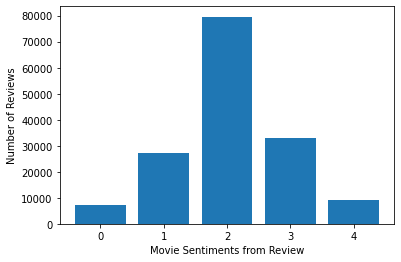

In [16]:
train_data.Sentiment.value_counts()
countSentiment=data.groupby('Sentiment').count()
plt.bar(countSentiment.index.values, countSentiment['Phrase'])
plt.xlabel('Movie Sentiments from Review')
plt.ylabel('Number of Reviews')
plt.show()


The sentiment labels are:

0 - negative; 1 - somewhat negative; 2 - neutral; 3 - somewhat positive; 4 - positive

In [11]:
print(train_data.iloc[0]['Phrase'],'Sentiment - ',train_data.iloc[0]['Sentiment'])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . Sentiment -  1


In [12]:
print(train_data.iloc[1]['Phrase'],'Sentiment - ',train_data.iloc[1]['Sentiment'])

A series of escapades demonstrating the adage that what is good for the goose Sentiment -  2


In [13]:
print(train_data.iloc[32]['Phrase'],'Sentiment - ',train_data.iloc[32]['Sentiment'])
print('\n')
print(train_data.iloc[33]['Phrase'],'Sentiment - ',train_data.iloc[33]['Sentiment'])

for the gander , some of which occasionally amuses but none of which amounts to much of a story Sentiment -  2


the gander , some of which occasionally amuses but none of which amounts to much of a story Sentiment -  1


*Lets clean the phrases by removing punctuation marks and splitting them into a list*



In [43]:
import string
from nltk.stem import WordNetLemmatizer

string.punctuation
lm = WordNetLemmatizer()

def own_analyser(phrase):
    phrase = phrase.split()
    for i in range(0,len(phrase)):
        k = phrase.pop(0)
        if k not in string.punctuation:
                phrase.append(lm.lemmatize(k).lower())    
    return phrase


In [14]:
train_data.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [19]:
X = train_data['Phrase']
y = train_data['Sentiment']

# ***Model Training***

In [30]:
from sklearn.model_selection import train_test_split
phrase_train,phrase_test,sentiment_train,sentiment_test = train_test_split(X,y,test_size=0.3)


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])


#LG
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(phrase_train, sentiment_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(phrase_test)

confusion_matrix(predictions, sentiment_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[  372,   227,    43,     9,     1],
       [ 1079,  2874,  1294,   268,    38],
       [  614,  4660, 21008,  4555,   446],
       [   57,   361,  1591,  4531,  1516],
       [    6,    25,    66,   443,   734]])

In [39]:
from sklearn.naive_bayes import MultinomialNB

pipeline.fit(phrase_train,sentiment_train)
predictions = pipeline.predict(phrase_test)

from sklearn.metrics import classification_report

print(classification_report(sentiment_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.03      0.06      2128
           1       0.51      0.24      0.33      8147
           2       0.61      0.90      0.72     24002
           3       0.53      0.38      0.44      9806
           4       0.57      0.04      0.08      2735

    accuracy                           0.59     46818
   macro avg       0.56      0.32      0.33     46818
weighted avg       0.57      0.59      0.53     46818



# ***Model Prediction***

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, sentiment_test))
print("Precision : ", precision_score(predictions, sentiment_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, sentiment_test, average = 'weighted'))

Accuracy :  0.6305053611858686
Precision :  0.7159204478663953
Recall :  0.6305053611858686


# ***Reading Test Data***

In [33]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.tsv',sep='\t')

In [34]:
test_data.head(10)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [37]:
test_data.info

<bound method DataFrame.info of        PhraseId  SentenceId                                             Phrase
0        156061        8545  An intermittently pleasing but mostly routine ...
1        156062        8545  An intermittently pleasing but mostly routine ...
2        156063        8545                                                 An
3        156064        8545  intermittently pleasing but mostly routine effort
4        156065        8545         intermittently pleasing but mostly routine
...         ...         ...                                                ...
66287    222348       11855             A long-winded , predictable scenario .
66288    222349       11855               A long-winded , predictable scenario
66289    222350       11855                                    A long-winded ,
66290    222351       11855                                      A long-winded
66291    222352       11855                               predictable scenario

[66292 rows x 3 col

In [38]:
test_data.shape

(66292, 3)

In [40]:
test_predictions = pipeline.predict(test_data['Phrase'])
phrase_id = test_data['PhraseId'].values
test_predictions.shape

(66292,)

In [41]:
final_answer = pd.DataFrame({'PhraseId':phrase_id,'Sentiment':test_predictions})

In [42]:
final_answer.head()

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


# ***Trying on other reviews***

In [66]:
ex=[input(("enter a string: "))]
re2=model.predict(ex)
if(re2==0):
  print("negative")
elif (re2==1):
  print("sort of negative")
elif (re2==2):
  print("moderate") 
elif (re2==3):
  print("sort of positive")
else:
  print("positive")

enter a string: good movie
sort of positive


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True